In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
max_len = 200
embedding_size = 128
filters = 250
kernel_size = 3
hidden_dims = 128
input_layer = Input(shape=(max_len,), dtype='int32')
embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_size, input_length=max_len)(input_layer)
conv_layer = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
hidden_layer = Dense(hidden_dims, activation='relu')(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
df = pd.read_csv('toxic.csv')

comment = df['comment'].values
toxic = df['toxic'].values

x_train, x_test, y_train, y_test = train_test_split(comment, toxic, test_size=0.2, random_state=42)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

Epoch 1/10
181/181 [==============================] - 19s 95ms/step - loss: 0.4701 - accuracy: 0.7762 - val_loss: 0.3413 - val_accuracy: 0.8557
Epoch 2/10
181/181 [==============================] - 17s 92ms/step - loss: 0.2160 - accuracy: 0.9160 - val_loss: 0.3466 - val_accuracy: 0.8613
Epoch 3/10
181/181 [==============================] - 17s 92ms/step - loss: 0.1055 - accuracy: 0.9637 - val_loss: 0.4116 - val_accuracy: 0.8658
Epoch 4/10
181/181 [==============================] - 19s 104ms/step - loss: 0.0563 - accuracy: 0.9820 - val_loss: 0.5317 - val_accuracy: 0.8536
Epoch 5/10
181/181 [==============================] - 20s 110ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.5280 - val_accuracy: 0.8578
Epoch 6/10
181/181 [==============================] - 20s 112ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.6298 - val_accuracy: 0.8585
Epoch 7/10
181/181 [==============================] - 19s 107ms/step - loss: 0.0205 - accuracy: 0.9945 - val_loss: 0.6324 - val_accur

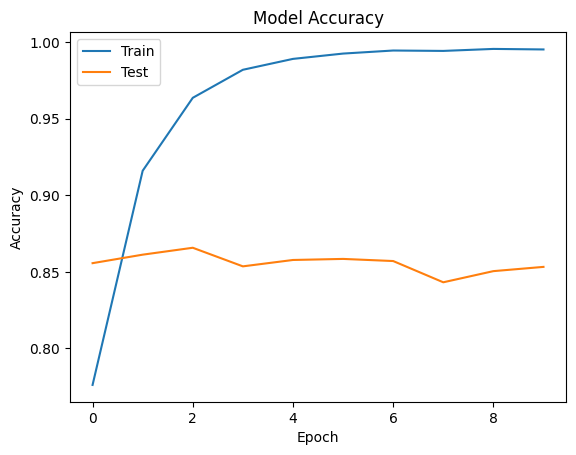

In [5]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
model.save('model_5.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
loaded_model = tf.keras.models.load_model('model_5.h5')
text = ['']
# Преобразовать текст в числовой формат
text_seq = tokenizer.texts_to_sequences(text)
# Заполнить до максимальной длины последовательности
text_seq_padded = tf.keras.preprocessing.sequence.pad_sequences(text_seq, maxlen=max_len)
# Получить предсказание
prediction = loaded_model.predict(text_seq_padded)
print(prediction)

1/1 [==============================] - 0s 123ms/step
[[0.7043032]]
